# Assignment 3

## Nama    : Ida Nur Laela
## Program : Python for Data Science
## Batch   : 4/015
Dataset : bank.csv

## Import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
pd.set_option("display.max.columns", None)

## Create Function

In [3]:
# function evaluation model 
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediction Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, f1-score, and kappa score
    precision = metrics.precision_score(y_test, y_pred)

    # Caclculate recall 
    recall = metrics.recall_score(y_test, y_pred)
    # calculate f1-score
    f1_score = metrics.f1_score(y_test, y_pred)
    # calculate kappa score 
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}
    # return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
    #         'cm': cm}        

## Import Dataset

In [4]:
import xlrd
df = pd.read_excel("bank-full.xlsx")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Prepocessing Dataset

In [6]:
# print the dimension of data set
df.shape

(45211, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# mengubah kolom y menjadi deposit
df_bank = df.rename(columns={'y': 'deposit'}) 

In [9]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Distribusi Class

Distribusi yang ideal adalah antara 50:50

In [10]:
df_bank['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [11]:
# cek kesesuaian data
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# ubah type data menjadi categorical
categorical = ["job","marital","education","default","housing","loan","contact","poutcome","deposit"]

for col in categorical: 
    df_bank[col] = df_bank[col].astype("category")

In [13]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  deposit    45211 non-null  category
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [14]:
# get number of unique values for each column
counts = df_bank.nunique()
counts

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

In [15]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Identifikasi duplikasi data

In [16]:
dups = df_bank.duplicated()
print(dups.any())

False


Artinya tidak ada duplikasi data pada dataset

In [17]:
df_bank.duplicated().sum()

0

## Checking Missing Values

In [18]:
# mengecek missing value dari dataset
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [19]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Scalling Data

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


## Encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
kol_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [22]:
# process encode categorical data 
df_encode = pd.DataFrame(encoder.fit_transform(df_bank[kol_cat]))

##print(df_encode)
df_encode.columns = encoder.get_feature_names(kol_cat)
print(df_encode.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
# drop 
df_bank = df_bank.drop(kol_cat ,axis=1)
print(df_bank)

            age   balance       day  duration  campaign     pdays  previous  \
0      1.606965  0.256419 -1.298476       261 -0.569351 -0.411453 -0.251940   
1      0.288529 -0.437895 -1.298476       151 -0.569351 -0.411453 -0.251940   
2     -0.747384 -0.446762 -1.298476        76 -0.569351 -0.411453 -0.251940   
3      0.571051  0.047205 -1.298476        92 -0.569351 -0.411453 -0.251940   
4     -0.747384 -0.447091 -1.298476       198 -0.569351 -0.411453 -0.251940   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.947747 -0.176460  0.143418       977  0.076230 -0.411453 -0.251940   
45207  2.831227  0.120447  0.143418       456 -0.246560 -0.411453 -0.251940   
45208  2.925401  1.429593  0.143418      1127  0.721811  1.436189  1.050473   
45209  1.512791 -0.228024  0.143418       508  0.399020 -0.411453 -0.251940   
45210 -0.370689  0.528364  0.143418       361 -0.246560  1.476138  4.523577   

      deposit  
0          no  
1          no  
2  

In [24]:
df_bank = pd.concat([df_encode, df_bank], axis=1)
df_bank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no


In [25]:
# encode target value
df_bank['deposit'] = df_bank['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print(df_bank.shape)
df_bank.head()

(45211, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0


## Memisahkan Feature dan Target

In [26]:
# select features
feature = df_bank.drop('deposit', axis=1)

In [27]:
# select target
target = df_bank['deposit']

## Split Data Training dan Data Testing

80:20

In [28]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (36168, 51)
Shape testing feature: (9043, 51)
Shape training label: (36168,)
Shape training label: (9043,)


## Logistik Regression

In [29]:
from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
eval_lr = evaluate_model(model_lr, X_test, y_test)
print ('Logistic Regression Accuracy:', eval_lr['accuracy'])

Logistic Regression Accuracy: 0.8993696782041358


In [31]:
# display confussion matriks
print('Confusion matrix:', eval_lr['cm'])

Confusion matrix: [[7797  196]
 [ 714  336]]


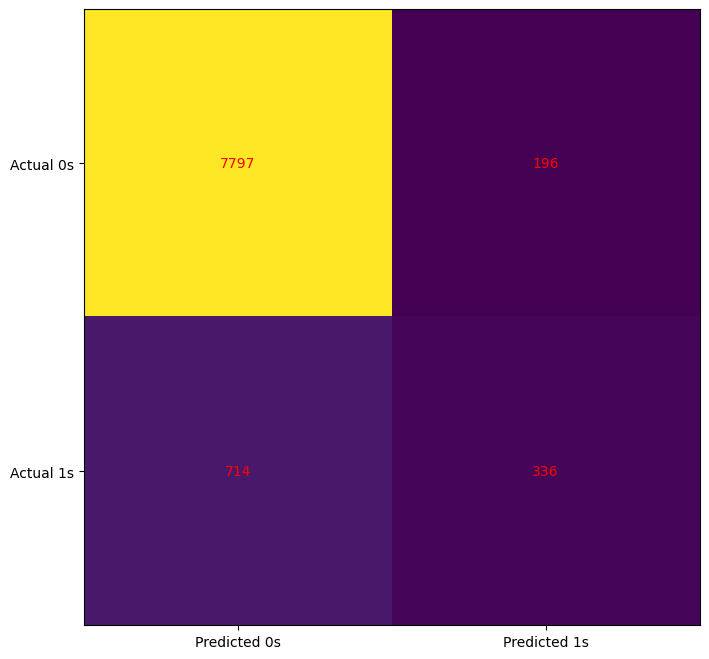

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_lr['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_lr['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## KNN

In [33]:
# import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# create KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# train the model using the training sets
model_knn.fit(X_train, y_train)

# predict the response for test dataset
eval_knn = evaluate_model(model_knn, X_test, y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
print('KNN Accuracy:', eval_knn['accuracy'])

KNN Accuracy: 0.8894172287957536


In [35]:
# display Confussion matriks
print('Confusion matrix:', eval_knn['cm'])

Confusion matrix: [[7745  248]
 [ 752  298]]


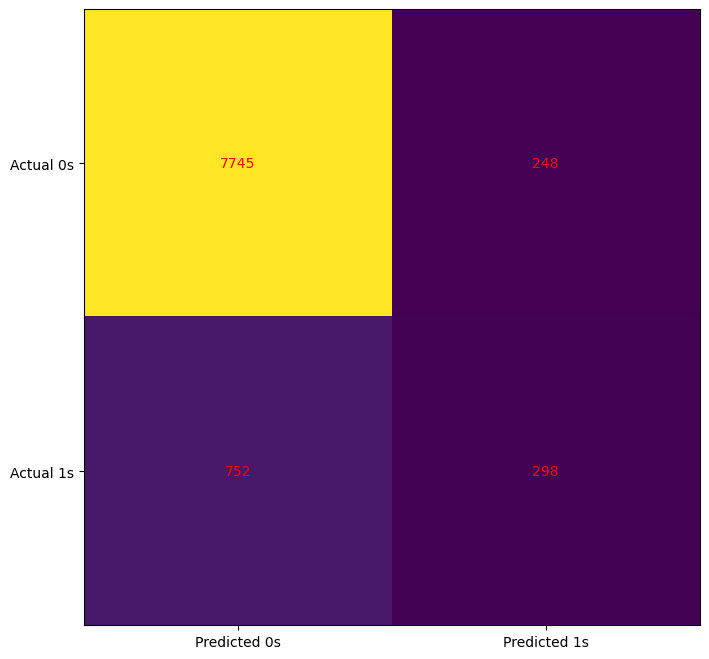

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_knn['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_knn['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## Suport Vektor Machine

In [37]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [38]:
svm_pred =svm_model.predict(X_test)

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.8893066460245493


In [40]:
# menampilkan confussion matriks
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, svm_pred)
print(matrix)

[[7876  117]
 [ 884  166]]


## Decision Tree

In [41]:
from sklearn import tree
model_dt=tree.DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
eval_dtree = evaluate_model(model_dt, X_test, y_test)
print('DTree Accuracy:', eval_dtree['accuracy'])

DTree Accuracy: 0.8799071104721884


In [43]:
# menampilkan confussion matriks
print('Confusion matrix:', eval_dtree['cm'])

Confusion matrix: [[7403  590]
 [ 496  554]]


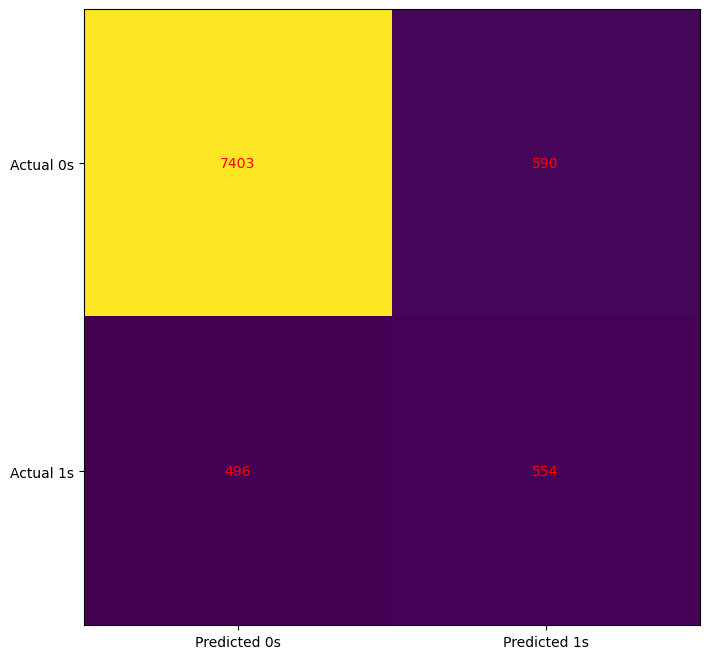

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_dtree['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_dtree['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
eval_rf = evaluate_model(model_rf, X_test, y_test)
print('RandomForest Accuracy:', eval_rf['accuracy'])

RandomForest Accuracy: 0.9053411478491651


In [47]:
# menampilkan confussion matriks
print('Confusion matrix:', eval_dtree['cm'])

Confusion matrix: [[7403  590]
 [ 496  554]]


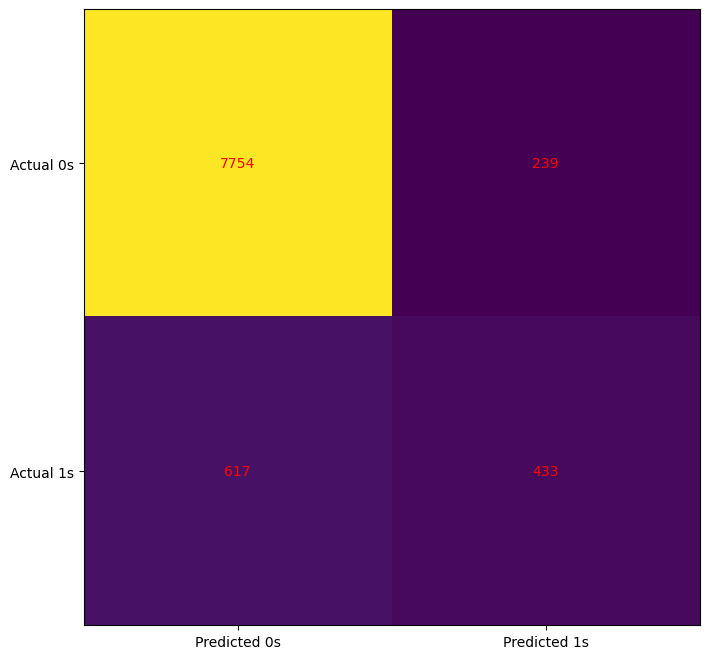

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_rf['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_rf['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB 
model_nb=GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [50]:
eval_nb = evaluate_model(model_nb, X_test, y_test)
print('Naive Bayes Accuracy:', eval_nb['accuracy'])

Naive Bayes Accuracy: 0.8514873382726971


In [51]:
# menampilkan confussion matriks
print('Confusion matrix:', eval_dtree['cm'])

Confusion matrix: [[7403  590]
 [ 496  554]]


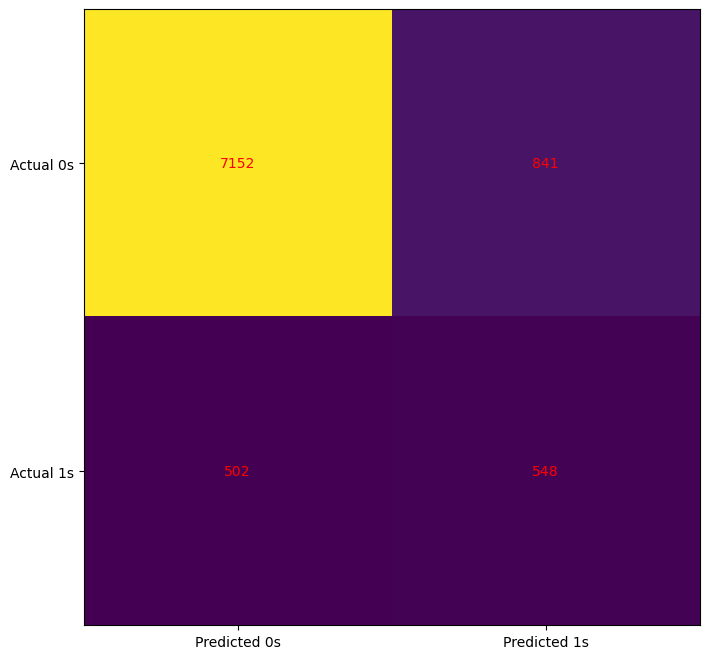

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_nb['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_nb['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## Visualisasi

In [56]:
df_bank = df.rename(columns={'y': 'deposit'}) 

In [57]:
df_bank['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [59]:
labels = df_bank['deposit'].unique()
labels

array(['no', 'yes'], dtype=object)

In [79]:
# melihat persentase jumlah masing-masing nasabah terhadap program berlangganan deposito berjangka
data_deposit = pd.DataFrame({"Deposit":df_bank['deposit'].value_counts(), 
                          "Presentase":(df_bank['deposit'].value_counts()/df_bank.shape[0])*100})
data_deposit

,Deposit,Presentase
no,39922,88.30152
yes,5289,11.69848


## Pie Charts

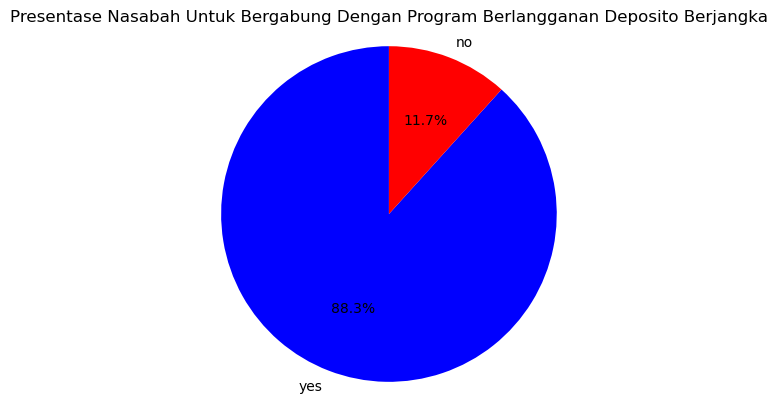

In [78]:
jumlah = data_deposit['Deposit']
label = ['yes','no']
warna = ['blue','red'] 

plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90, colors=warna)
plt.axis('equal')
plt.title('Presentase Nasabah Untuk Bergabung Dengan Program Berlangganan Deposito Berjangka')
plt.show()

* Keterangan :
  Pada pie chart diatas sebesar 88.3% nasabah memilih untuk bergabung dengan program berlangganan deposito sedangkan 11.7% memilih tidak.

## Histogram

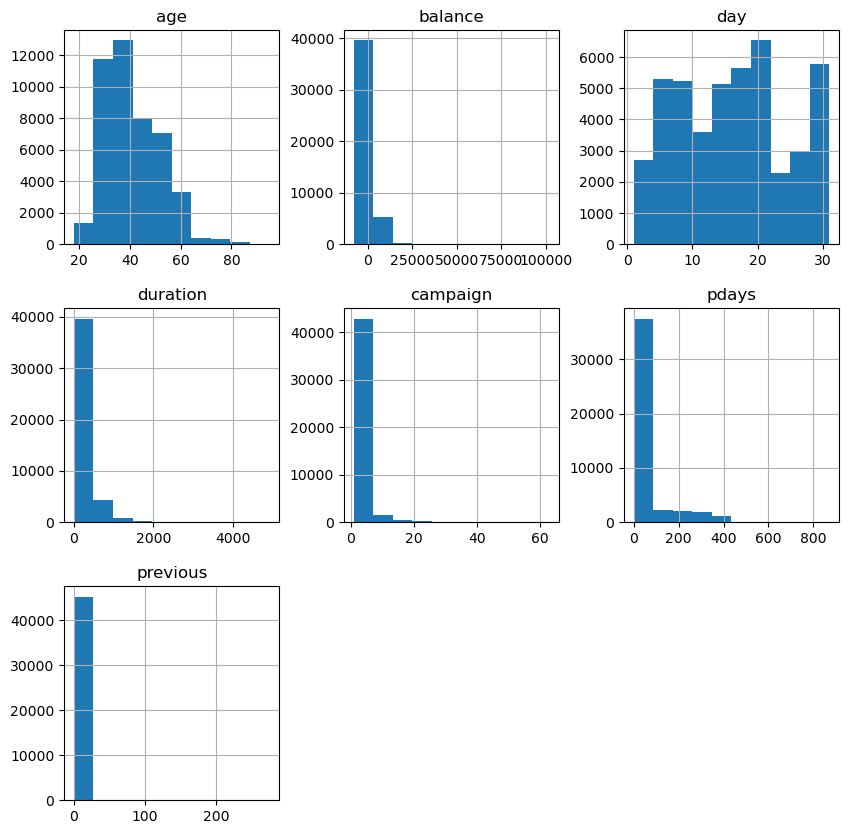

In [72]:
df_bank.hist(figsize=(10,10))
plt.show()

## Bar Chart

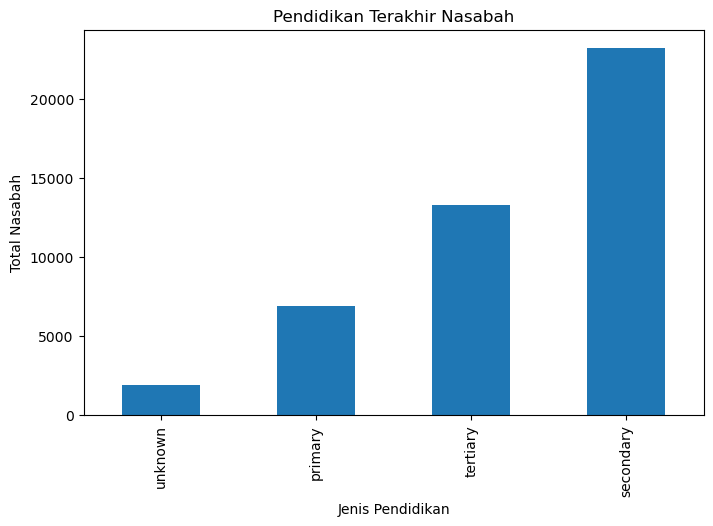

In [77]:
df_bank['education'].value_counts().sort_values().plot(kind='bar', figsize=(8,5))

plt.title('Pendidikan Terakhir Nasabah')
plt.xlabel('Jenis Pendidikan')
plt.ylabel('Total Nasabah')
plt.show()

In [75]:
df_bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Keterangan :

Dari hasil bar chart diatas menunjukan bahwa terdapat penggolongan jenis pendidikan nasabah. Dimana 1857 nasabah yang tidak diketahui pendidikan terakhirnya dan 6851 nasabah dari tamatan SD (primary), dan 13301 nasabah dari tamatan SMP (tertiary) dan sisanya yaitu 23202 nasabah dari tamatan SMA (secondary)

## Kesimpulan

In [91]:
print('Hasil beberapa akurasi dari model machine learning:')
print('Akurasi Logistic Regression:', eval_lr['accuracy'])
print('Akurasi K-Nearest Neighbors:', eval_knn['accuracy'])
print('Akurasi Support Vector Machine:', metrics.accuracy_score(y_test, svm_pred))
print('Akurasi Decision Tree:', eval_dtree['accuracy'])
print('Akurasi Random Forest:', eval_rf['accuracy'])
print('Akurasi Naive Bayes:', eval_nb['accuracy'])

Hasil beberapa akurasi dari model machine learning:
Akurasi Logistic Regression: 0.8993696782041358
Akurasi K-Nearest Neighbors: 0.8894172287957536
Akurasi Support Vector Machine: 0.8893066460245493
Akurasi Decision Tree: 0.8799071104721884
Akurasi Random Forest: 0.9053411478491651
Akurasi Naive Bayes: 0.8514873382726971
